# Basic Statistics

## probability distrition funcitons (PDFs)

A vast library of statistical distibtions with analytic descripions have been extensivly studdied and named.  These can be found in books on statistics and on [wikipedia](https://en.wikipedia.org/wiki/List_of_probability_distributions).  These distributions give the probaility density $P(x)$ which gives the relative probability that a random variable $x$ will occur.  A random variable is a potential outcome of an experiment or population, what we call a ‘data point’. Some obvious examples include the observed magnitude and the inferred redshifts or even categories like stars versus galaxies. Other examples include intensity as a function of sky location, wavelength, or of time. 

These PDfs are typically normalized such that $\int P(x) dx = 1$.  With this normalizaiton we can interpret the proability of some range of events by integrating over that range.   For example the probability that $1<x<2$ is given by $\int_1^2 P(x) dx.  This is how we convert 1 and 2 sigma gaussian errors to the 68\% and 95\% confidence intervals.






### Examples of distributions

Some imortant distibtions include:

1. The Gaussian (A.K.A. Normal) distribution which is the most well know statistical distibtion.   It provides a good description of some (or depending on your attitude many) experimental results.  In can be represnted as 
$$ P(x) =\frac{1}{\sigma \sqrt{2 \pi}} e^{\frac{-1}{2} \left(\frac{(x-\mu)}{\sigma}\right)^2 } $$ where $\mu$ is the mean, and $\sigma$ is the standard deviation.  

1. The Poisson distirbiton which describes the probability of some number of uncorrelated events happening in a given time interval.  $$ P(k,\lambda) =\frac{\lambda^k e^{-\lambda} }{k!}. $$  Here $\lambda$ is the probibility mass funciton, and $k$ is the number occurances.  Examples could include radioactive decay, or the arrival of photons in a astronomical destector.  For example if one 10 X-ray photons strike a detecor in 20 s, then the $\lambda = 0.5$ for a one second interval.  The poisson distribiton can then be evaluated to find the probaibility of detecting 1, 2, ...  photons in one second.

1. The Chi-squared distribiton gives the distribtion of the sum of the squares of $k$ indepndant gaussian distribtions.  $$P(x) = \frac{1}{2^{k/2} \Gamma(k/2) x^{k/2-1}e^{-x/2} .}$$ Here $k$ is the number of degrees of freedom, $x$ is the statistical quantity, and $\Gamma$ is a gamma function which like $\sin(x)$ can be evaluaed by computers.   This distribiton is very useful for goodnetss of fit tests.

1. The uniform distribtion which can be used to model where a point will fall in an interval with uniform probability.
 

In what follows we will generate realizations of these simulated data to illustrate some of the aspects of statistics that will be used in this course.






## generating realizations of a distribtion

Python 9 makes it easy to generate realizations of data from a wide variety of statical distribtions.  (see [Numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html))

Lets start by generating a ralization of gaussian noise comparing it to the analytic form above. 



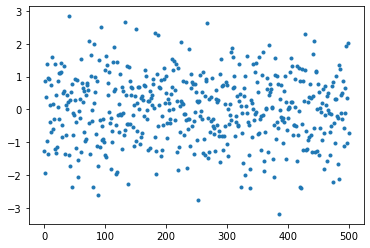

In [3]:
## import useful libraries
import numpy as np
import matplotlib.pyplot as plt

## generate a realization of 1000 samples following a gaussian distribtion with zero mean and unit variance

data = np.random.randn(500)
plt.plot(data,".")


A very useful way to intrepret data is to make a higogram. These can be compared to Theoretical distribtions.

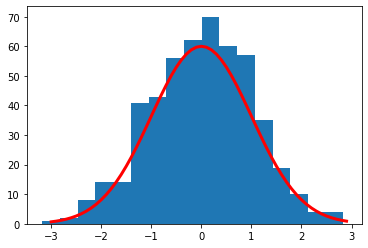

In [4]:
## make and plot a histrogam
plt.hist(data, bins='auto')

## overplot the analytic form of a gaussin, guess the ampltude 
A = 60
sigma = 1
x = np.arange(-3,3,0.1)
Gaussian = A *np.exp(-0.5*(x/sigma)**2)
plt.plot(x,Gaussian,"r-",linewidth=3)

### Excercise: 
Create simulated data to have a mean of 1, and a variance differnt from 0.33.  Plot the data vs sampel and make a histrogram including the analytic fit as we did for the simple example above.  Estimate (by runing multiple caseses, multiple times) how many samples do you need to draw before you find one below zero? Discuss how this relates to 3 sigma results and why they are not regarded as sufficent for a discovery.

In [5]:
## your code goes here

your discussion goes here


## calculating moments

It is often useful to compute moments of these distribtutions to summarize (compress) the information they contain.  The mean and variance are the most famous examples.  The genral equaiton for moments is:

#### 

\begin{equation}
\langle x^n \rangle  = \rm{E(x^n)} = \displaystyle\int_{-\infty}^{\infty} x^n \phi(x) dx
\label{eq:moments} \tag{4}
\end{equation}

where $\langle x^n \rangle  = \rm{E(x^n)}$ is defined as the expectation value. n = 1,2,3 are the first, second, third, etc moments. 

The first moment is just the (PDF) weighted mean (see above example). 

<i> Centered moments </i> are higher moments shifted to this mean: $\mu^n = \langle (x - \langle x \rangle )^n \rangle$

An important centered moment is for n = 2: $\mu^2 = \langle (x - \langle x \rangle )^2 \rangle$. What do we call this?


We define the above as the <i>variance</i>, which is the square of the spread about the mean. One can easily show that:

$$\mu^2 = E(x^2) - (E(x))^2$$

One can use the above techniques to calculate the variance about the mean of the <i>Poisson Distribution</i> and find:

$$\mu^2 = \sigma^2 = \lambda$$

where we have switched to the more common variance label, $\sigma^2$. It is interesting that the variance in a Poisson distribution has the same value is its mean.

If you have evidence that your data were generated through a Poisson process (or you measure a Poisson process), you will often see means and errors quoted as $m \pm{\sqrt{m}}$ (e.g. photon counting with $m$ counts). 

The third moment, called the skewness, $⟨x^3⟩$, characterizes the simplest asymmetry, while the fourth moment, the kurtosis, $⟨x^4⟩$, characterizes the flatness of the distribution.



### Excercise
Generate a realization of the Poisson distribtion with 10000 saples and lamda = 10.  Compute the mean, standard deviation, skewness, and kertossis.  

In [6]:
## your code goes in this box

discussion goes here

## Multiple random processes

Often multiple random porcesses, perhaps obeying seperate statistical distribtions will contribute to the description of the data.  A question that comes up a lot is: "what happens to the momnents" in cases where multiple sources of errors are present.  The following math proves the rule that for statistically indpendant quantities, the moments of the sum is the sum of the moments.

\begin{align*} 
		E(X+Y) &= \sum_{x} \sum_{y} (x+y) p(x, y)\\ 
		&= \sum_{x} \sum_{y}\left(x p(x, y) + y p(x, y)\right)\\ 
		&= \sum_{x} \sum_{y} x p(x, y) + \sum_{x} \sum_{y} y p(x, y)\\ 
		&= \sum_x x \sum_y p(x,y) + \sum_y y \sum_x p(x,y)\\ 
		&= \sum x p_X(x) + \sum_y y p_Y(y)\\ 
		&= E(X) + E(Y) 
\end{align*}


For example if X and Y are gaussians with unit varaince and we compute the variance of the sum we would get $\sigma^2 = 2$.  Since the RMS = $\sqrt{\sigma^2}$ this shows the rule that ading equal errors increases the error by $\sqrt{2}$.

###Excercise: 

Imagine a light detector with an intrinsic noise described by a gaussian of mean zero and unit variance.  Call this distribtion $x_1$   If this detector is pointed at the sky, atmospheric emission could contribute a statisticaly indepndant signal described by poisson statisstics.  Call this signal $x_2$ and assume $\lambda = 0.2$.  

Compute the mean and the variance for these distribtins individually and for the sum.  Confirm that the moments of the sum is the sum of the moments for these two cases. 

In [7]:
## your code goes in this box

## correlation and covariance

#### 
Consider 4 coins and 5 flips each and we record the results:

Coin 𝐴:+,−,−,+,−

Coin 𝐵:−,−,−,−,+

Coin 𝐶:+,−,+,+,−

Coin 𝐷:−,+,−,−,+

Which coins are correlated and by how much?

##### 
....we define a function that is positive when the two results are similar, and negative when they are dissimilar. The easiest function is multiplication: it will be positive when the coins have the same result (++ or --) and negative when they differ (+- and -+). 

We can multiply each trial, $\it{then\ average\ the\ results}$ to get an overall estimate of how similar the results are.

$\begin{align}
C_{AB} &= \frac{-1+1+1-1-1}{5} = 0.2 \tag{5}\\
C_{AC} &= \frac{+1+1-1+1+1}{5} = 0.6 \tag{6}\\
C_{AD} &= \frac{-1-1+1-1-1}{5} = -0.6 \tag{7} \\
\end{align}$

So 𝐴 and 𝐵 seem pretty uncorrelated, 𝐴 and 𝐶 may be correlated, and 𝐴 and 𝐷 are anti-correlated.

### formal definitions

For bivariate distributions (of two random variables), consider the probaility distribution $\phi(x,y)$ where the random variables $X$ and $Y$ are <i>NOT</i> independent, one can also define a covariance (assuming $⟨x⟩ = ⟨y⟩ = 0$):

$$Cov(x,y) = \langle xy \rangle = \int_{-\infty}^{\infty} xy\ \phi(xy)\ dxdy = E\big[(xy)\big] \tag{8}$$

This leads to a formal definition of the correlation coefficient:

$$r = \frac{Cov(x,y)}{Var(x)Var(y)} \tag{9}$$

where $Var$ is the variance as defined above. 

with more than two variables are present we often subscript $r$ as $r_{ij}$ where $i$ and $j$ specify the two channels being considered.  The collection of all possible $r_{ij}$ elements represtns the covaraince (or correleation) matrix.

### equivelent definitions
Sometimes, you will see an equivalent definiton using vectors (for centered data):

$$r = cos\theta = \frac{\vec{a} \cdot \vec{b}}{|a||b|}$$

If the data are not centered, then we have:
$$Cov(x,y) = E\big[(x-\mu_x)(y-\mu_y)\big]$$

and

$$r = \frac{E\big[(x-\mu_x)(y-\mu_y)\big]}{\sqrt{\mu^2_x\mu^2_y}}$$

which is nominally known as the <i> Pearson correlation coefficient </i>.

In practive for a sample of $x,y$ pairs, we write:

$$r = \frac{\sum_{i=1}^{N}(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{N}(x_i - \bar{x})^2}\sqrt{\sum_{i=1}^{N}(y_i - \bar{y})^2}} \tag{10}$$

Covariance can range from -$\infty$ to +$\infty$. But Correlation ranges from -1 to +1. Unlike the correlation, the magnitude of the covariance does not mean anything since it is dependent upon the magnitude of the constituent of the series. However in both cases, the sign DOES matter. 

To be super clear, <i>correlation is the covariance</i>, but normalized to the sample variances. Because it is normalized, the value of the correlation becomes a meaningful quantity to compare to other correlations.

There is a fun article which presents 13 different (!) interpretations of correlation [here](https://www.stat.berkeley.edu/~rabbee/correlation.pdf).

### Excercise

Consider the three timesreams given below $x$, $y$, and $z$.  Compute the covariance, and the correlation between these channels.   How many independant covarainces and correlations are there to compute?

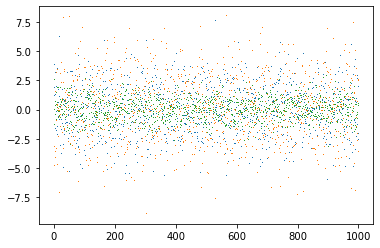

In [8]:
A = np.random.randn(1000)
B = np.random.randn(1000)
C = np.random.randn(1000)

x = A +2*B
y = -2*A - 2*B -0.5*C
z=  C

plt.plot(x,",")
plt.plot(y,",")
plt.plot(z,",")


## compute your answeres here.

## error bars

Often you will use statistics to sumarize data and test models.   For example, imagine trying to find the BAO bump in the correlation funciton.   We will build a toy model for this correlation funciton and then simulate error bars on this toy model both with an without correlations.  The first goal will be to teach you how to scrutinize plots with error bars and assess if they have correlations.  The second goal will be to learn how to use chi-squared to test models.



(-0.1, 0.2)

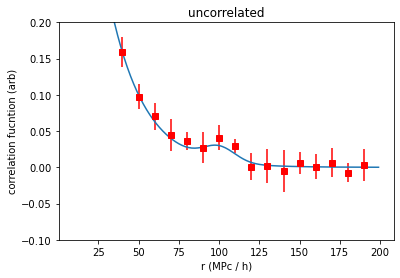

In [59]:
## make a toy modle for the galaxy-galaxy corerlation funciton

r = np.arange(190) + 10
gal_gal_cor_empricial_theory = 1*(1/10.)**(r/50.)+ 0.02*np.exp(-0.5*((r-100)/10.)**2)
plt.plot(r,gal_gal_cor_empricial_theory)
plt.xlabel("r (MPc / h)")
plt.ylabel("correlation fucntion (arb)")


## make simulated data with error bars, no correlation
bin_width = 10. # the sampling of the measurement
N_pts_in_bin  = 5 # numper of samples used to compute the mean and rms in each bin
N_data_pts = 190 / bin_width  ## number of data points for the plot
sigma_corr = 0.02  ## uncertainty in the correlatoin fucntion

i = 0
while (i < N_data_pts):
    r_bin  = bin_width*(i+1)
    theory_mean = gal_gal_cor_empricial_theory[(np.where(r == r_bin))[0] ]
    data_in_bin = np.random.randn(N_pts_in_bin)*sigma_corr + theory_mean
    mean_pt = np.mean(data_in_bin)
    stdev_pt = np.std(data_in_bin)
    plt.errorbar(r_bin,mean_pt,stdev_pt,marker='s',mec='red',mfc='red',c="red")
    i+=1

plt.title("uncorrelated")
plt.ylim(-.1,.2)




## Excercise

why don't the central values (eg the squares) lie on the line? Re-run this code and see how varius relaizations look. increase N_pts_in_bin and see how the mean converges and the variance on the variance decreases.  Discuss

### correlated case

(-0.1, 0.2)

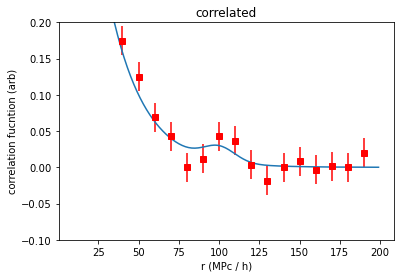

In [57]:
## make a toy modle for the galaxy-galaxy corerlation funciton

r = np.arange(190) + 10
gal_gal_cor_empricial_theory = 1*(1/10.)**(r/50.)+ 0.02*np.exp(-0.5*((r-100)/10.)**2)
plt.plot(r,gal_gal_cor_empricial_theory)
plt.xlabel("r (MPc / h)")
plt.ylabel("correlation fucntion (arb)")


## make simulated data with error bars, no correlation
bin_width = 10. # the sampling of the measurement
N_pts_in_bin  = 5 # numper of samples used to compute the mean and rms in each bin
N_data_pts = 190 / bin_width  ## number of data points for the plot
sigma_corr = 0.02  ## uncertainty in the correlatoin fucntion
## new line
correlatipon_fator = 0.8



## include nearesst neighbor correlation 
random_in_bin_last = np.random.randn(N_pts_in_bin)*sigma_corr + theory_mean


    
i = 0
while (i < N_data_pts):
    r_bin  = bin_width*(i+1)
    theory_mean = gal_gal_cor_empricial_theory[(np.where(r == r_bin))[0] ]
    ## inbclude correlations
    random_in_bin = np.random.randn(N_pts_in_bin)
    
    data_in_bin = random_in_bin + correlatipon_fator*random_in_bin_last
    data_in_bin /= np.std(data_in_bin)  ## keep the stad at 1 for now
    data_in_bin = data_in_bin*sigma_corr + theory_mean

    random_in_bin_last = random_in_bin  ## prepare for next sample
    
        
    mean_pt = np.mean(data_in_bin)
    stdev_pt = np.std(data_in_bin)
    plt.errorbar(r_bin,mean_pt,stdev_pt,marker='s',mec='red',mfc='red',c="red")
    i+=1

plt.title("correlated")
plt.ylim(-.1,.2)





## excercise

how is this different by eye?